# Análises Preditivas

## Carregar dados das ações

In [1]:
!pip install yfinance

  Using cached yfinance-0.2.18-py2.py3-none-any.whl (60 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.3.8-cp310-cp310-win_amd64.whl (35 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [2]:
import yfinance as yf

In [3]:
ticker = str(input('Digite o código da ação: ')).strip()
dados = yf.Ticker(ticker=ticker).history('2y')
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-02 00:00:00-03:00,11.951576,12.266206,11.912247,12.178809,103985100,0.0,0.0
2021-06-04 00:00:00-03:00,12.261836,12.506549,12.200658,12.454110,102757300,0.0,0.0
2021-06-07 00:00:00-03:00,12.454111,12.475960,12.239988,12.362345,74548900,0.0,0.0
2021-06-08 00:00:00-03:00,12.309906,12.585207,12.218138,12.524029,88398600,0.0,0.0
2021-06-09 00:00:00-03:00,12.550248,12.707563,12.462851,12.524029,60724200,0.0,0.0


<Axes: xlabel='Date'>

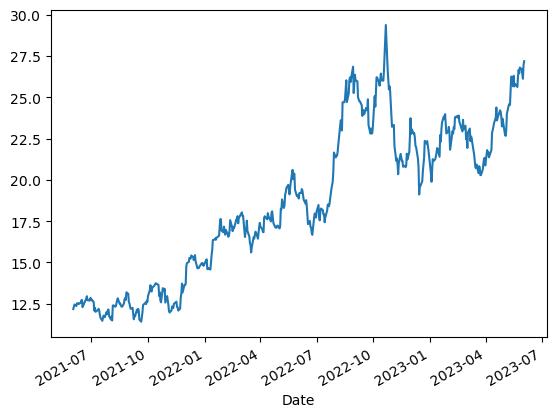

In [4]:
dados.Close.plot()

## Tratamento de dados

In [5]:
treinamento = dados.reset_index()
treinamento = treinamento[['Date', 'Close']]
treinamento['Date'] = treinamento['Date'].dt.tz_localize(None)
treinamento.columns = ['ds', 'y']
treinamento

,ds,y
0,2021-06-02,12.178809
1,2021-06-04,12.454110
2,2021-06-07,12.362345
3,2021-06-08,12.524029
4,2021-06-09,12.524029
...,...,...
495,2023-05-29,26.690001
496,2023-05-30,26.389999
497,2023-05-31,26.120001
498,2023-06-01,26.959999


## Treinando o modelo de Machine Learning 

In [ ]:
!pip install prophet

In [7]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [ ]:
# Modelo de INTELIGÊNCIA ARTIFICIAL - ML
modelo = Prophet()

In [ ]:
# Treinar o modelo
modelo.fit(treinamento)

14:12:13 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing


## Realizar previsões

In [ ]:
periodo = modelo.make_future_dataframe(90)
periodo = modelo.predict(periodo)
periodo


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-02,15.570571,13.968499,15.793913,15.570571,15.570571,-0.741399,-0.741399,-0.741399,0.678875,0.678875,0.678875,-1.420274,-1.420274,-1.420274,0.0,0.0,0.0,14.829172
1,2021-06-04,15.429987,13.454249,15.349795,15.429987,15.429987,-1.022240,-1.022240,-1.022240,0.726217,0.726217,0.726217,-1.748457,-1.748457,-1.748457,0.0,0.0,0.0,14.407747
2,2021-06-07,15.219111,12.818678,14.599671,15.219111,15.219111,-1.530975,-1.530975,-1.530975,0.677176,0.677176,0.677176,-2.208151,-2.208151,-2.208151,0.0,0.0,0.0,13.688136
3,2021-06-08,15.148819,12.627210,14.401582,15.148819,15.148819,-1.653118,-1.653118,-1.653118,0.690356,0.690356,0.690356,-2.343473,-2.343473,-2.343473,0.0,0.0,0.0,13.495701
4,2021-06-09,15.078527,12.413702,14.238458,15.078527,15.078527,-1.787836,-1.787836,-1.787836,0.678875,0.678875,0.678875,-2.466711,-2.466711,-2.466711,0.0,0.0,0.0,13.290691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2023-08-27,29.746898,29.400803,32.896213,28.106927,31.194675,1.428358,1.428358,1.428358,-1.757235,-1.757235,-1.757235,3.185593,3.185593,3.185593,0.0,0.0,0.0,31.175256
586,2023-08-28,29.786402,31.828896,35.388007,28.121386,31.255746,3.882891,3.882891,3.882891,0.677176,0.677176,0.677176,3.205715,3.205715,3.205715,0.0,0.0,0.0,33.669293
587,2023-08-29,29.825906,31.761901,35.506724,28.142504,31.315960,3.905936,3.905936,3.905936,0.690356,0.690356,0.690356,3.215580,3.215580,3.215580,0.0,0.0,0.0,33.731842
588,2023-08-30,29.865410,31.881918,35.531859,28.158559,31.382598,3.893942,3.893942,3.893942,0.678875,0.678875,0.678875,3.215066,3.215066,3.215066,0.0,0.0,0.0,33.759352


In [ ]:
plot_plotly(modelo, periodo)